In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import seaborn as sns

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt



# Load the Titanic dataset

titanic_data = sns.load_dataset('titanic')



# Preview the first few rows

titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#  1. Dataset Overview

In [2]:
# Basic Info
titanic_data.info()

# Statistical Summary
titanic_data.describe(include='all')

# Shape of the dataset
print(f"Dataset contains {titanic_data.shape[0]} rows and {titanic_data.shape[1]} columns.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
Dataset contains 891 rows and 15 columns.


# 2. Missing Values

In [5]:
# Count of missing values
missing_values = titanic_data.isnull().sum()
missing_percent = (missing_values / len(titanic_data)) * 100
missing_df = pd.DataFrame({'Missing Count': missing_values, 'Missing %': missing_percent})
missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing %', ascending=False)


,Missing Count,Missing %
deck,688,77.216611
age,177,19.865320
embarked,2,0.224467
embark_town,2,0.224467


# 3. Univariate Analysis (Distribution)

**🔹 Categorical Features**

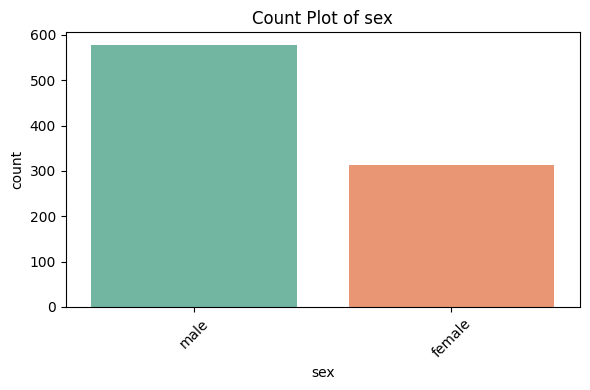

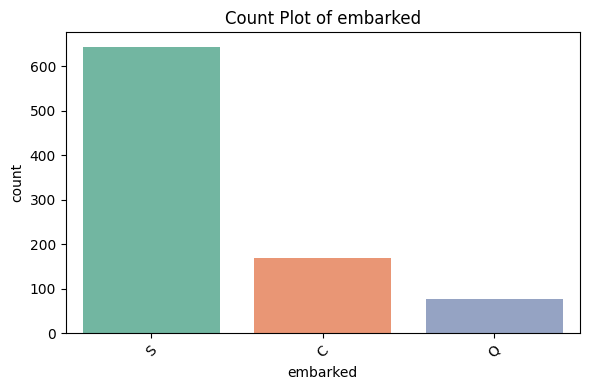

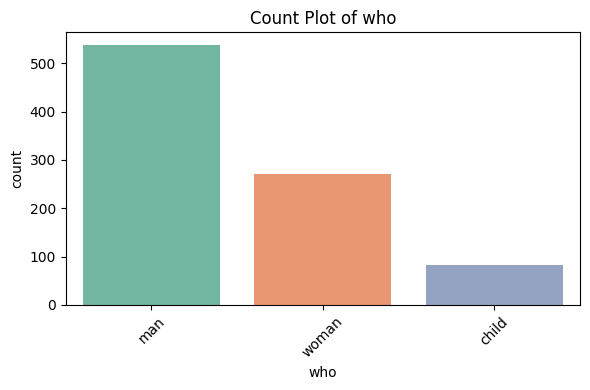

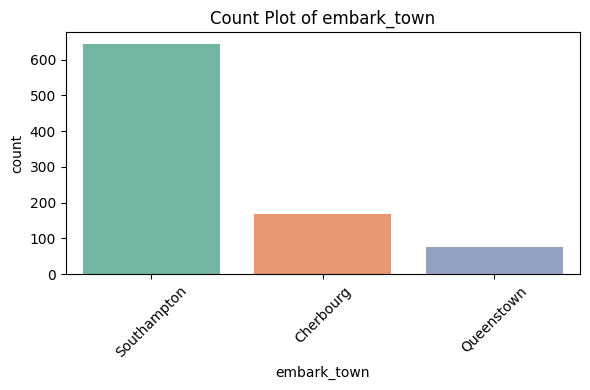

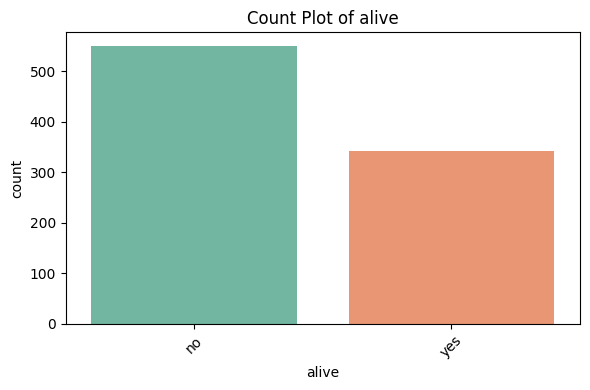

In [6]:
categorical_cols = titanic_data.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=titanic_data, x=col, palette='Set2')
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


**🔹 Numerical Features**

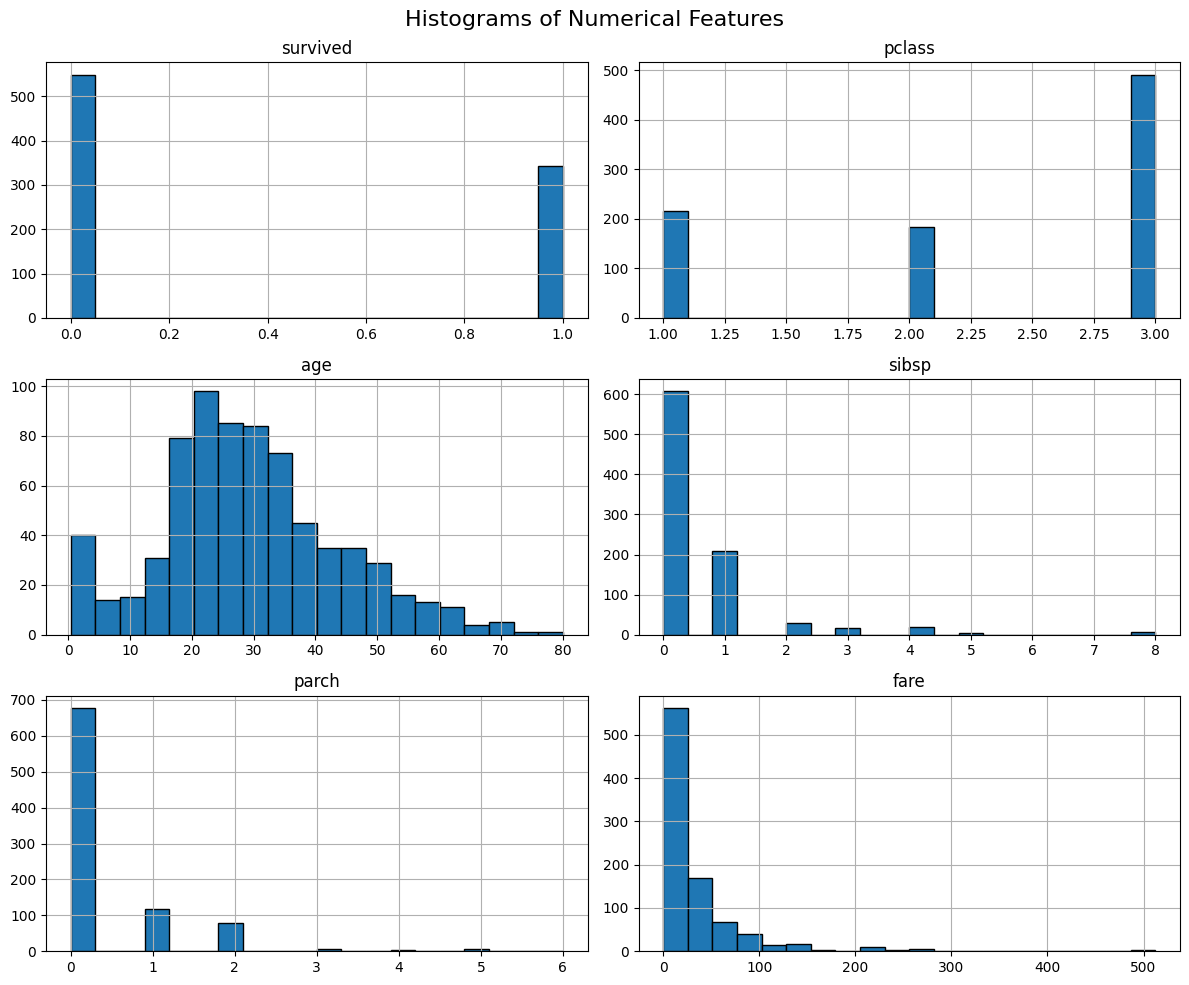

In [7]:
numerical_cols = titanic_data.select_dtypes(include=['int64', 'float64']).columns

titanic_data[numerical_cols].hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()


#  4. Outlier Detection (Box Plots)

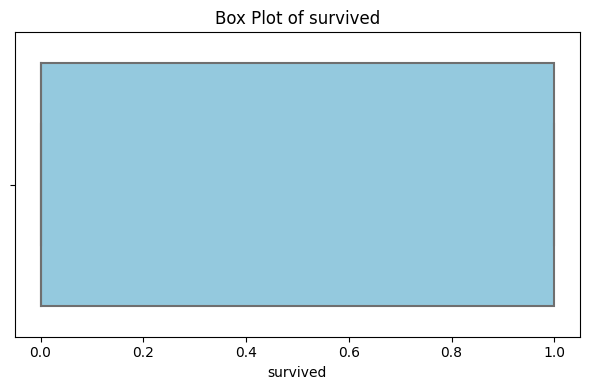

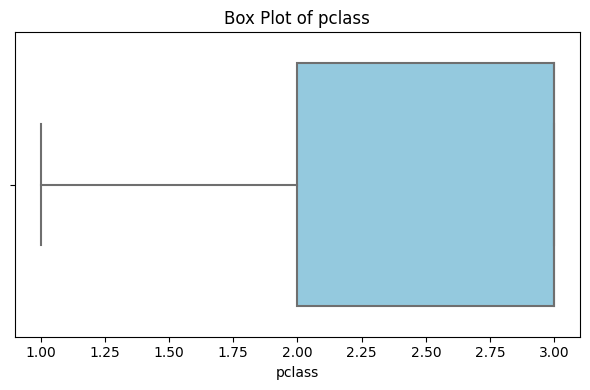

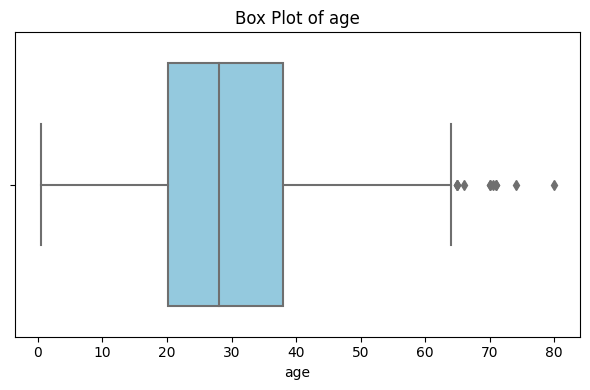

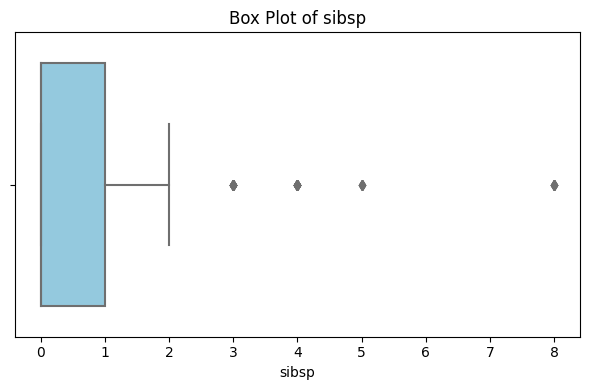

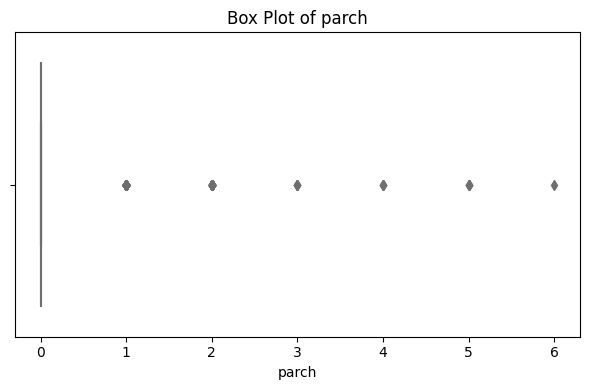

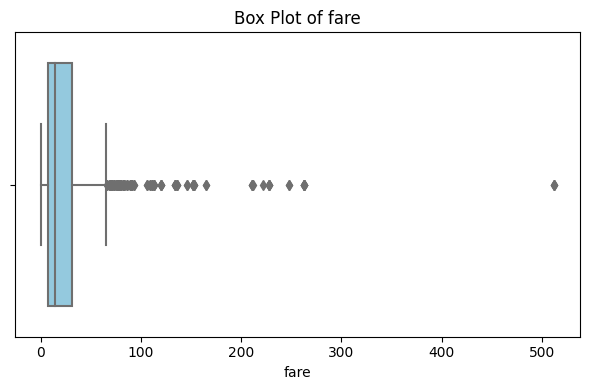

In [8]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=titanic_data[col], color='skyblue')
    plt.title(f"Box Plot of {col}")
    plt.tight_layout()
    plt.show()


#  5. Bivariate Analysis

**🔹 Survival by Gender, Class, and Embarked**

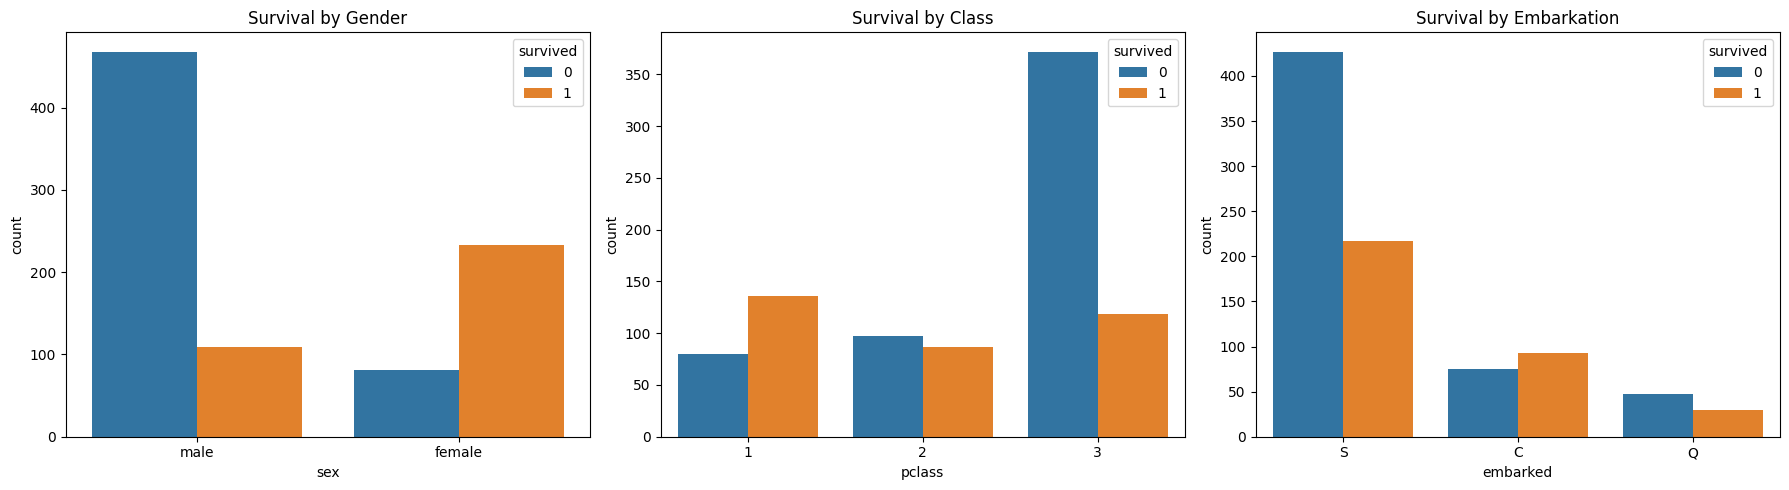

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.countplot(x='sex', hue='survived', data=titanic_data, ax=axes[0])
axes[0].set_title('Survival by Gender')

sns.countplot(x='pclass', hue='survived', data=titanic_data, ax=axes[1])
axes[1].set_title('Survival by Class')

sns.countplot(x='embarked', hue='survived', data=titanic_data, ax=axes[2])
axes[2].set_title('Survival by Embarkation')

plt.tight_layout()
plt.show()


**🔹 Age and Fare vs. Survival (Boxplot)**

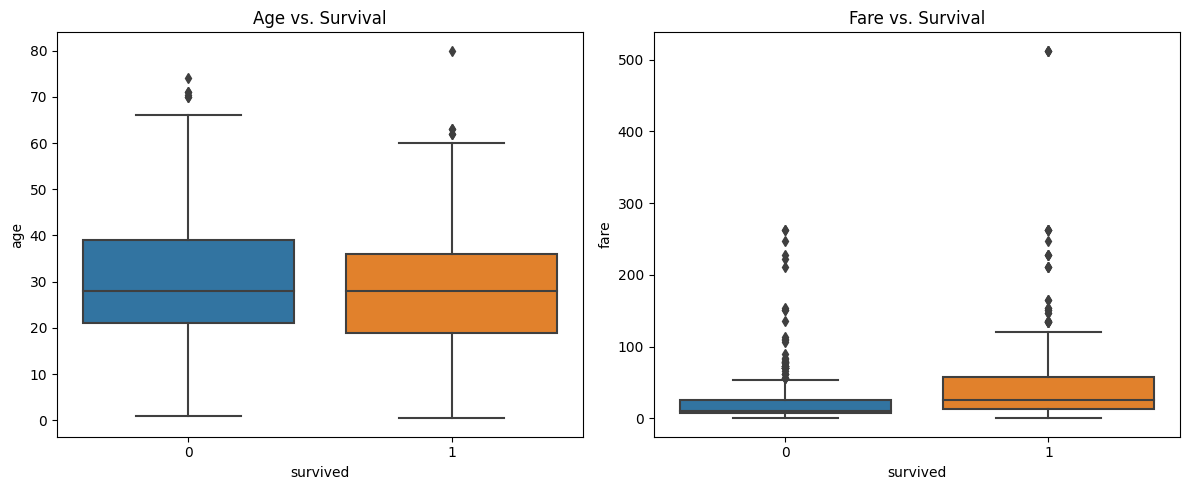

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(x='survived', y='age', data=titanic_data, ax=axes[0])
axes[0].set_title('Age vs. Survival')

sns.boxplot(x='survived', y='fare', data=titanic_data, ax=axes[1])
axes[1].set_title('Fare vs. Survival')

plt.tight_layout()
plt.show()


#  6. Correlation Heatmap

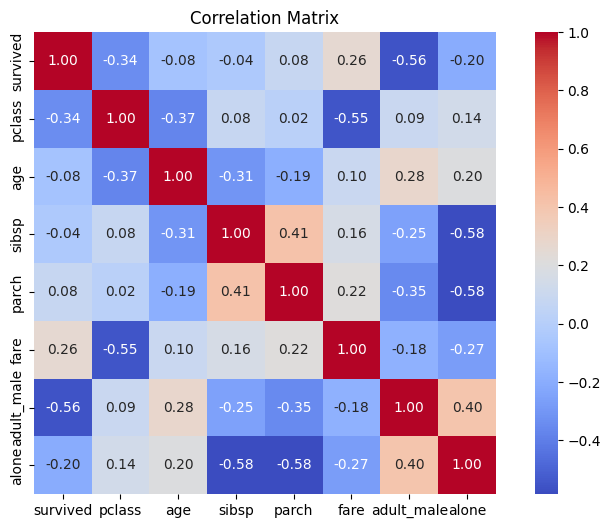

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(titanic_data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.show()


# 7. Pairplot for Selected Features

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

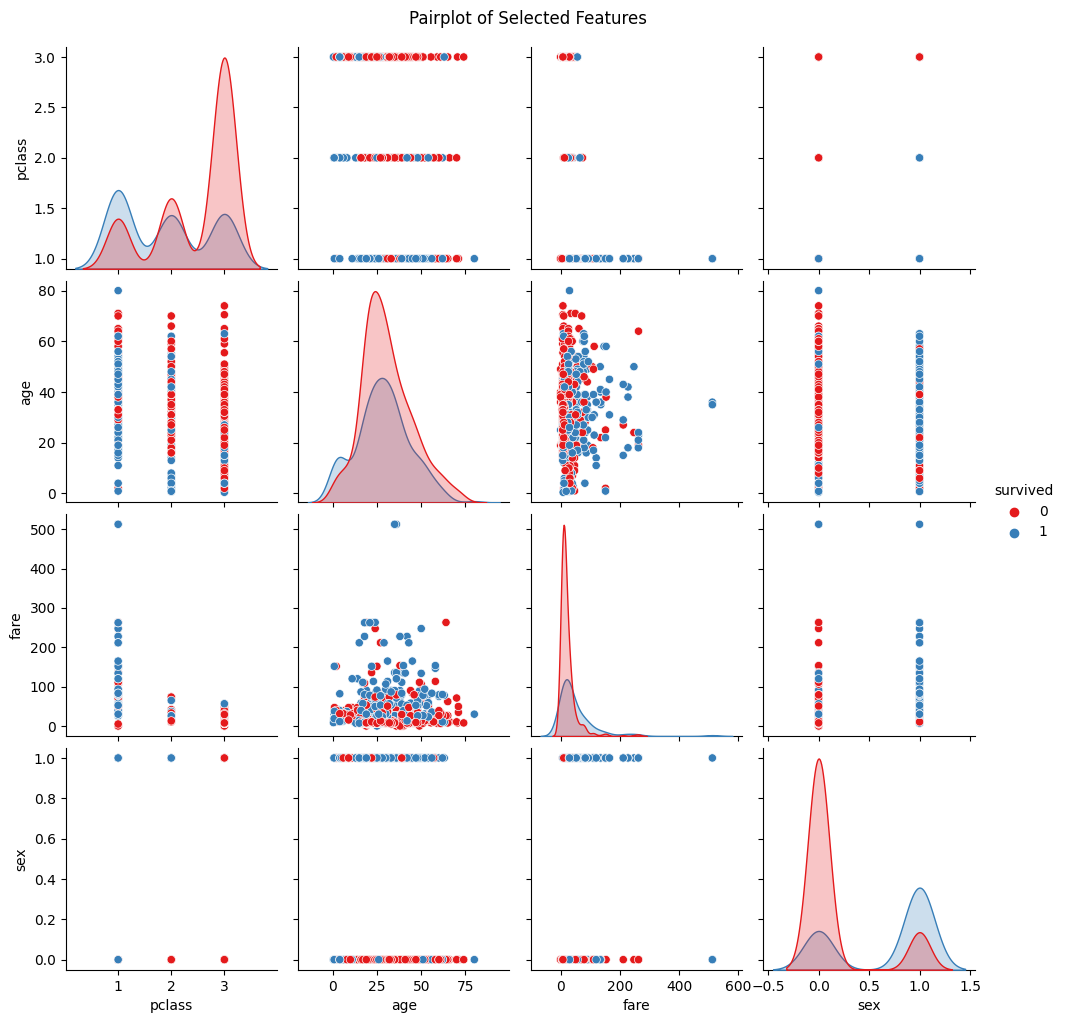

In [14]:
titanic_encoded = titanic_data.copy()
titanic_encoded['sex'] = titanic_encoded['sex'].map({'male': 0, 'female': 1})

selected = ['survived', 'pclass', 'age', 'fare', 'sex']
sns.pairplot(titanic_encoded[selected].dropna(), hue='survived', palette='Set1')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()